In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df_bank=pd.read_csv(r"D:\Practice\BankDataPreprocessing\data\Bank_data_before_processing.csv",sep=',',index_col=0)

In [3]:
df_bank

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,4591,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10150 entries, 0 to 8
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10056 non-null  object 
 3   CreditScore      10132 non-null  float64
 4   Geography        9954 non-null   object 
 5   Gender           9867 non-null   object 
 6   Age              9879 non-null   float64
 7   Tenure           10070 non-null  float64
 8   Balance          9994 non-null   float64
 9   NumOfProducts    9862 non-null   float64
 10  HasCrCard        10067 non-null  float64
 11  IsActiveMember   10063 non-null  float64
 12  EstimatedSalary  10106 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.2+ MB


In [5]:
df_bank.isna().sum()

RowNumber            0
CustomerId           0
Surname             94
CreditScore         18
Geography          196
Gender             283
Age                271
Tenure              80
Balance            156
NumOfProducts      288
HasCrCard           83
IsActiveMember      87
EstimatedSalary     44
Exited               0
dtype: int64

In [6]:
df_bank['RowNumber'].nunique()

10000

In [7]:
df_bank['RowNumber'].duplicated().any()

True

In [8]:
df_bank[df_bank['RowNumber'].duplicated(keep=False)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
26,27,15736816,Young,756.0,NaN,Male,36.0,2.0,136815.64,NaN,1.0,1.0,170041.95,0
151,152,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
220,221,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,4591,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [9]:
duplicated_Row_Number=list(df_bank[df_bank['RowNumber'].duplicated(keep=False)]['RowNumber'].unique())

In [10]:
df_bank[df_bank['RowNumber'].isin(duplicated_Row_Number)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
26,27,15736816,Young,756.0,NaN,Male,36.0,2.0,136815.64,NaN,1.0,1.0,170041.95,0
151,152,15759618,Alexeeva,535.0,France,Female,48.0,9.0,0.00,1.0,1.0,0.0,149892.79,1
220,221,15725311,Hay,726.0,France,Female,31.0,9.0,114722.05,2.0,1.0,1.0,98178.57,0
227,228,15676895,Cattaneo,547.0,Germany,Female,39.0,6.0,74596.15,3.0,1.0,1.0,85746.52,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3613,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,4438,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,6550,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,4591,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [11]:
df_bank.drop_duplicates(subset='RowNumber',keep='first',inplace=True)

In [12]:
df_bank['RowNumber'].duplicated().any()

False

In [13]:
df_bank['CustomerId'].duplicated().any()

False

In [14]:
df_bank=df_bank.sort_values(by='CustomerId',ascending=False).reset_index(drop=True)

In [15]:
df_bank.drop(columns=['RowNumber'],inplace=True)

In [16]:
df_bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15815690,Akabueze,614.0,Spain,Female,40.0,3.0,113348.50,1.0,1.0,1.0,77789.01,0
1,15815660,Mazzi,758.0,France,Female,34.0,1.0,154139.45,1.0,1.0,1.0,60728.89,0
2,15815656,Hopkins,541.0,Germany,Female,39.0,9.0,100116.67,1.0,1.0,1.0,199808.10,1
3,15815645,Akhtar,481.0,France,NaN,37.0,8.0,152303.66,2.0,1.0,1.0,175082.20,0
4,15815628,Moysey,711.0,France,Female,37.0,8.0,113899.92,1.0,0.0,0.0,80215.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15565796,Docherty,745.0,Germany,Male,48.0,10.0,96048.55,1.0,1.0,0.0,74510.65,0
9996,15565779,Kent,627.0,Germany,Female,30.0,6.0,57809.32,1.0,1.0,0.0,188258.49,0
9997,15565714,Cattaneo,601.0,France,Male,47.0,1.0,64430.06,2.0,0.0,1.0,96517.97,0
9998,15565706,Akobundu,612.0,Spain,Male,35.0,1.0,0.00,1.0,1.0,1.0,83256.26,1


In [17]:
df_bank['CustomerId'].isna().any()

False

In [18]:
df_bank['Surname'].isna().sum()

92

In [19]:
df_bank[df_bank['Surname'].isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
68,15813871,NaN,690.0,France,Male,47.0,2.0,0.00,2.0,1.0,0.0,151375.73,0
176,15811314,NaN,589.0,Germany,Female,36.0,9.0,140355.56,NaN,1.0,0.0,136329.96,0
248,15809585,NaN,646.0,France,Male,38.0,7.0,0.00,2.0,1.0,0.0,1528.40,0
260,15809263,NaN,729.0,Germany,Male,29.0,5.0,109676.52,1.0,1.0,1.0,25548.47,0
288,15808566,NaN,516.0,France,Male,46.0,2.0,0.00,2.0,1.0,1.0,169122.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9400,15581388,NaN,487.0,Spain,Male,33.0,8.0,145729.71,1.0,1.0,0.0,41365.85,0
9491,15579040,NaN,556.0,France,Female,46.0,10.0,0.00,2.0,0.0,0.0,109184.24,0
9514,15578462,NaN,596.0,Spain,Female,76.0,9.0,134208.25,1.0,1.0,1.0,13455.43,0
9728,15572657,NaN,472.0,France,Male,29.0,8.0,102490.27,1.0,0.0,1.0,181224.56,0


In [20]:
df_bank.loc[df_bank['Surname'].isna(),'Surname']='NotReported'

In [21]:
df_bank['Surname'].isna().sum()

0

In [22]:
df_bank['CreditScore'].isna().sum()

18

## CreditScore is a continuous numerical value between 300 - 850 that depicts a customer's creditworthiness.
## The higher the score, the better a borrower looks to potential lenders.

In [24]:
df_bank['CreditScore'].describe()

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: CreditScore, dtype: float64

<Axes: >

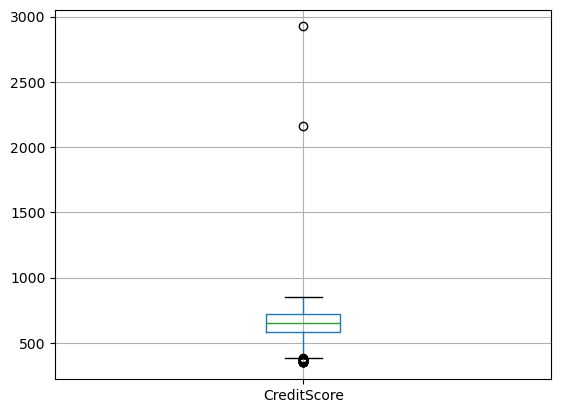

In [25]:
df_bank.boxplot(column=['CreditScore'])

In [26]:
df_bank[(df_bank['CreditScore']>850) | (df_bank['CreditScore']<300)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1553,15776631,Ma,2158.510025,France,Female,36.0,5.0,119540.15,1.0,0.0,1.0,80603.99,0
3502,15727619,Lock,2924.008649,Germany,Female,46.0,9.0,113909.69,3.0,1.0,0.0,92320.37,1


In [27]:
Credit_score_mean=df_bank[(df_bank['CreditScore']<=850) & (df_bank['CreditScore']>=300)]['CreditScore'].mean()

In [28]:
df_bank['CreditScore'].fillna(Credit_score_mean,inplace=True)

In [29]:
df_bank['CreditScore'].isna().any()

False

In [30]:
df_bank.loc[(df_bank['CreditScore']>850) | (df_bank['CreditScore']<300),'CreditScore']=Credit_score_mean

In [31]:
df_bank['CreditScore'].describe()

count    10000.000000
mean       650.523246
std         96.538706
min        350.000000
25%        584.000000
50%        651.500000
75%        717.000000
max        850.000000
Name: CreditScore, dtype: float64

In [32]:
df_bank['Geography'].value_counts(dropna=False)

Geography
France     4923
Germany    2451
Spain      2431
NaN         195
Name: count, dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

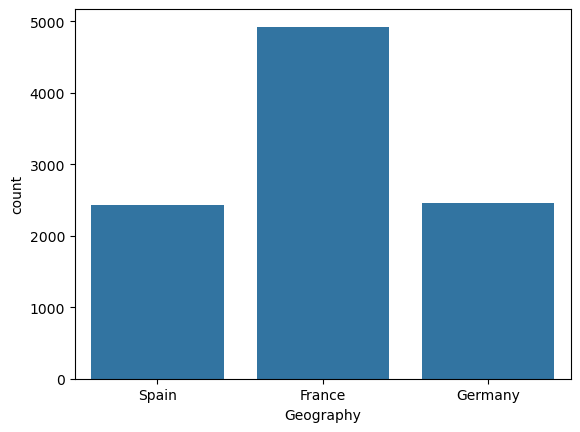

In [34]:
sns.countplot(x=df_bank['Geography'])
plt.show()

In [35]:
df_bank.loc[df_bank['Geography'].isna(),'Geography']='NotReported'

In [36]:
df_bank['Geography'].value_counts()

Geography
France         4923
Germany        2451
Spain          2431
NotReported     195
Name: count, dtype: int64

In [37]:
df_bank['Gender'].value_counts(dropna=False)

Gender
Male      5304
Female    4418
NaN        278
Name: count, dtype: int64

In [38]:
df_bank.loc[df_bank['Gender'].isna(),'Gender']='NotSpecified'

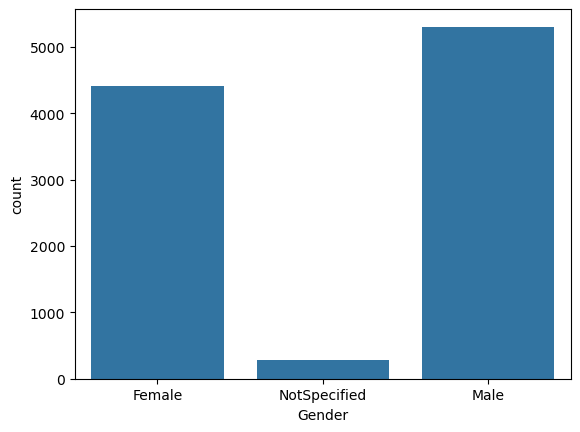

In [39]:
sns.countplot(x=df_bank['Gender'])
plt.show()

In [40]:
df_bank['Age'].describe()

count    9739.000000
mean       38.950816
std        10.560797
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64

In [41]:
df_bank['Age'].isna().sum()

261

In [42]:
df_bank.loc[df_bank['Age']<18]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4766,15696637,Sung,571.0,France,Female,-23.0,10.0,151097.28,1.0,0.0,1.0,17163.75,0
5417,15680430,Ajuluchukwu,601.0,Germany,Female,-49.0,4.0,96252.98,2.0,1.0,NaN,104263.82,0


In [43]:
df_bank['Age'].astype(str).str[-2:].value_counts()

Age
.0    9739
an     261
Name: count, dtype: int64

In [44]:
Age_median=df_bank[df_bank['Age']>=18]['Age'].median()

In [45]:
df_bank.loc[df_bank['Age'].isna(),'Age']=Age_median

In [46]:
df_bank['Age'].isna().sum()

0

In [47]:
df_bank.loc[df_bank['Age']<0,'Age']=abs(df_bank.loc[df_bank['Age']<0,'Age'])

In [48]:
df_bank['Age'].describe()

count    10000.000000
mean        38.914300
std         10.372816
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [49]:
def df_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    Lower_limit=df[col].quantile(.25)-(IQR*1.5)
    Upper_limit=df[col].quantile(.75)+(IQR*1.5)
    return Lower_limit,Upper_limit

In [50]:
df_outlier(df_bank,'Age')

(14.0, 62.0)

In [51]:
df_bank['Tenure'].value_counts(dropna=False)

Tenure
 2.000000     1039
 1.000000     1024
 7.000000     1022
 8.000000     1016
 3.000000     1006
 5.000000     1002
 4.000000      981
 9.000000      975
 6.000000      959
 10.000000     486
 0.000000      410
 NaN            78
 32.044103       1
-5.000000        1
Name: count, dtype: int64

In [52]:
df_bank['Tenure'].describe()

count    9922.000000
mean        5.014316
std         2.905638
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: Tenure, dtype: float64

In [53]:
sns.boxplot(x=df_bank['Tenure'])

<Axes: xlabel='Tenure'>

In [54]:
Tenure_Median=df_bank.loc[(df_bank['Tenure']>=0) | (df_bank['Tenure']<=10),'Tenure'].median()

In [55]:
df_bank['Tenure'].fillna(Tenure_Median,inplace=True)

In [56]:
df_bank.loc[(df_bank['Tenure']<0) | (df_bank['Tenure']>15),'Tenure']=Tenure_Median

In [57]:
df_bank['Tenure'].value_counts()

Tenure
5.0     1082
2.0     1039
1.0     1024
7.0     1022
8.0     1016
3.0     1006
4.0      981
9.0      975
6.0      959
10.0     486
0.0      410
Name: count, dtype: int64

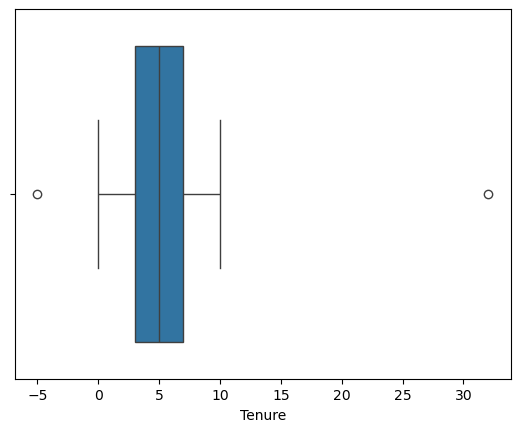

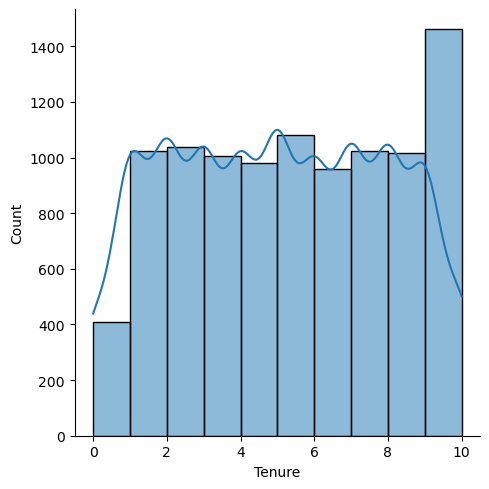

In [58]:
sns.displot(x=df_bank['Tenure'],bins=10,kde=True)
plt.show()

In [59]:
df_bank['Balance'].describe()

count    9.850000e+03
mean     7.672267e+04
std      6.372769e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.724599e+04
75%      1.276414e+05
max      1.036826e+06
Name: Balance, dtype: float64

In [60]:
df_bank['Balance'].isna().sum()

150

In [61]:
sns.distplot(df_bank['Balance'])

<Axes: xlabel='Balance', ylabel='Density'>

In [62]:
Balance_less_than=df_bank[df_bank['Balance']<0.4e6][['Balance']]

In [63]:
sns.displot(Balance_less_than)

In [64]:
df_outlier(df_bank,'Balance')[1]

319103.54375000007

In [65]:
df_bank[df_bank['Balance']>df_outlier(df_bank,'Balance')[1]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
797,15795540,Reye,556.0,France,Female,36.0,2.0,1.036826e+06,1.0,0.0,1.0,177670.57,0
4456,15704284,Ekechukwu,736.0,Germany,Male,57.0,9.0,9.697802e+05,1.0,1.0,0.0,28434.44,1


In [66]:
Balance_mean=df_bank.loc[df_bank['Balance']<df_outlier(df_bank,'Balance')[1],'Balance'].mean()

In [67]:
df_bank.loc[df_bank['Balance']>df_outlier(df_bank,'Balance')[1],'Balance']=Balance_mean

In [68]:
df_bank['Balance'].fillna(Balance_mean,inplace=True)

In [69]:
df_bank['Balance'].value_counts()

Balance
0.000000         3555
76534.495403      152
105473.740000       2
130170.820000       2
119684.880000       1
                 ... 
100471.340000       1
95900.040000        1
105301.500000       1
87842.980000        1
161993.890000       1
Name: count, Length: 6293, dtype: int64

In [70]:
sns.boxplot(y=df_bank['Balance'])

<Axes: ylabel='Count'>

In [71]:
df_bank['Balance'].describe()

count     10000.000000
mean      76534.495403
std       61873.309567
min           0.000000
25%           0.000000
50%       96131.715000
75%      127259.430000
max      250898.090000
Name: Balance, dtype: float64

In [72]:
df_bank['NumOfProducts'].value_counts(dropna=False)

NumOfProducts
 1.00000     4945
 2.00000     4450
 NaN          286
 3.00000      255
 4.00000       58
-2.00000        3
-1.00000        2
 11.17746       1
Name: count, dtype: int64

In [73]:
df_bank['NumOfProducts']=df_bank['NumOfProducts'].apply(lambda x: abs(x))

In [74]:
df_bank['NumOfProducts'].value_counts(dropna=False)

NumOfProducts
1.00000     4947
2.00000     4453
NaN          286
3.00000      255
4.00000       58
11.17746       1
Name: count, dtype: int64

In [75]:
NumOfProducts_median=df_bank.loc[df_bank['NumOfProducts']<10,'NumOfProducts'].median()

In [76]:
df_bank.loc[df_bank['NumOfProducts']>10,'NumOfProducts']=NumOfProducts_median

In [77]:
df_bank['NumOfProducts'].fillna(NumOfProducts_median,inplace=True)

In [78]:
sns.boxplot(df_bank['NumOfProducts'],showmeans=True)

<Axes: ylabel='Count'>

In [79]:
df_bank['NumOfProducts']=df_bank['NumOfProducts'].astype('int8')

In [80]:
df_bank['HasCrCard'].value_counts(dropna=False)

HasCrCard
1.0    6996
0.0    2924
NaN      80
Name: count, dtype: int64

In [81]:
df_bank['HasCrCard'].fillna(2.0,inplace=True)

In [82]:
df_bank['HasCrCard'].value_counts(dropna=False)

HasCrCard
1.0    6996
0.0    2924
2.0      80
Name: count, dtype: int64

In [83]:
df_bank['HasCrCard']=df_bank['HasCrCard'].astype('int8')

In [84]:
df_bank['IsActiveMember'].value_counts(dropna=False)

IsActiveMember
1.0    5104
0.0    4809
NaN      87
Name: count, dtype: int64

In [85]:
df_bank['IsActiveMember'].fillna(2.0,inplace=True)

In [86]:
df_bank['IsActiveMember']=df_bank['IsActiveMember'].astype('int8')

In [87]:
df_bank['IsActiveMember'].value_counts(dropna=False)

IsActiveMember
1    5104
0    4809
2      87
Name: count, dtype: int64

In [88]:
df_bank['IsActiveMember']=df_bank['IsActiveMember'].astype(pd.CategoricalDtype())

In [89]:
df_bank['IsActiveMember'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False, categories_dtype=int8)

In [90]:
df_bank['EstimatedSalary'].describe()

count      9957.000000
mean     100117.009341
std       57496.773622
min          11.580000
25%       51099.560000
50%      100240.200000
75%      149399.700000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [91]:
df_bank['EstimatedSalary'].isna().sum()

43

In [92]:
sns.boxplot(df_bank['EstimatedSalary'])

<Axes: ylabel='Count'>

In [93]:
salary_mean=df_bank['EstimatedSalary'].mean()

In [94]:
df_bank['EstimatedSalary'].fillna(salary_mean,inplace=True)

In [95]:
df_bank['EstimatedSalary'].isna().any()

False

In [96]:
df_bank['Exited'].value_counts(dropna=False)

Exited
0    7963
1    2037
Name: count, dtype: int64

In [97]:
df_bank['Exited']=df_bank['Exited'].astype('int8')

## Final arrangements

In [99]:
df_bank.shape

(10000, 13)

In [100]:
df_bank.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [101]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  float64 
 3   Geography        10000 non-null  object  
 4   Gender           10000 non-null  object  
 5   Age              10000 non-null  float64 
 6   Tenure           10000 non-null  float64 
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int8    
 9   HasCrCard        10000 non-null  int8    
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  int8    
dtypes: category(1), float64(5), int64(1), int8(3), object(3)
memory usage: 742.4+ KB


In [102]:
df_bank.to_csv('./data/churn_data_processed.csv')

## Categorical variables transformation

In [104]:
df_bank.CustomerId.nunique()

10000

In [105]:
df_bank.drop(columns=['CustomerId'],inplace=True,axis=1)

In [106]:
df_bank

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Akabueze,614.0,Spain,Female,40.0,3.0,113348.50,1,1,1,77789.01,0
1,Mazzi,758.0,France,Female,34.0,1.0,154139.45,1,1,1,60728.89,0
2,Hopkins,541.0,Germany,Female,39.0,9.0,100116.67,1,1,1,199808.10,1
3,Akhtar,481.0,France,NotSpecified,37.0,8.0,152303.66,2,1,1,175082.20,0
4,Moysey,711.0,France,Female,37.0,8.0,113899.92,1,0,0,80215.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Docherty,745.0,Germany,Male,48.0,10.0,96048.55,1,1,0,74510.65,0
9996,Kent,627.0,Germany,Female,30.0,6.0,57809.32,1,1,0,188258.49,0
9997,Cattaneo,601.0,France,Male,47.0,1.0,64430.06,2,0,1,96517.97,0
9998,Akobundu,612.0,Spain,Male,35.0,1.0,0.00,1,1,1,83256.26,1


In [107]:
df_bank['Surname'].nunique()

2926

In [108]:
surname_mean_encoded=df_bank.groupby('Surname')['Exited'].mean().to_dict()

In [109]:
df_bank['Surname']=df_bank['Surname'].map(surname_mean_encoded)

In [110]:
df_bank['Surname'].value_counts()

Surname
0.000000    2929
0.250000     732
0.333333     510
0.500000     502
0.200000     485
            ... 
0.066667      15
0.600000      15
0.266667      15
0.416667      12
0.454545      11
Name: count, Length: 72, dtype: int64

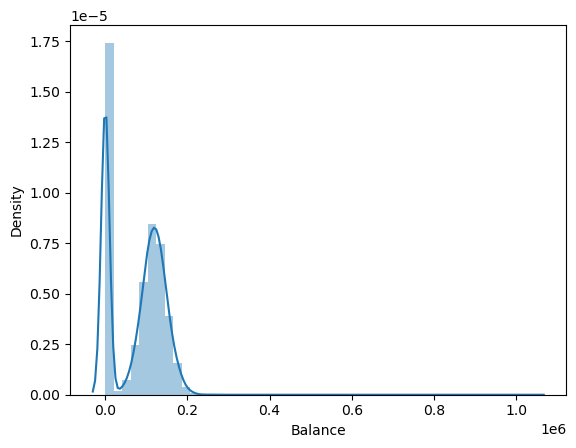

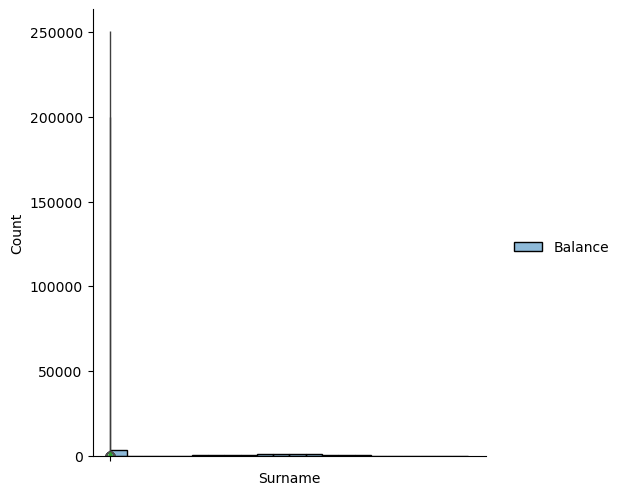

In [111]:
sns.histplot(x=df_bank['Surname'],bins=20)
plt.show()

In [112]:
df_bank['Geography'].value_counts()

Geography
France         4923
Germany        2451
Spain          2431
NotReported     195
Name: count, dtype: int64

In [113]:
geography_one_hot=pd.get_dummies(df_bank['Geography'],dtype='int8',prefix='Geography')

In [114]:
geography_one_hot

,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
9995,0,1,0,0
9996,0,1,0,0
9997,1,0,0,0
9998,0,0,0,1


In [115]:
df_bank=df_bank.merge(geography_one_hot,how='outer',left_index=True, right_index=True)

In [116]:
df_bank.drop(columns='Geography',inplace=True)

In [117]:
df_bank

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain
0,0.500000,614.0,Female,40.0,3.0,113348.50,1,1,1,77789.01,0,0,0,0,1
1,0.153846,758.0,Female,34.0,1.0,154139.45,1,1,1,60728.89,0,1,0,0,0
2,0.500000,541.0,Female,39.0,9.0,100116.67,1,1,1,199808.10,1,0,1,0,0
3,0.200000,481.0,NotSpecified,37.0,8.0,152303.66,2,1,1,175082.20,0,1,0,0,0
4,0.000000,711.0,Female,37.0,8.0,113899.92,1,0,0,80215.20,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,745.0,Male,48.0,10.0,96048.55,1,1,0,74510.65,0,0,1,0,0
9996,0.142857,627.0,Female,30.0,6.0,57809.32,1,1,0,188258.49,0,0,1,0,0
9997,0.133333,601.0,Male,47.0,1.0,64430.06,2,0,1,96517.97,0,1,0,0,0
9998,0.285714,612.0,Male,35.0,1.0,0.00,1,1,1,83256.26,1,0,0,0,1


In [118]:
df_bank['Gender'].value_counts()

Gender
Male            5304
Female          4418
NotSpecified     278
Name: count, dtype: int64

In [119]:
dummy_gender=pd.get_dummies(df_bank['Gender'],prefix='Gender',dtype='int8')

In [120]:
df_bank=df_bank.merge(dummy_gender,how='outer',left_index=True,right_index=True)

In [121]:
df_bank

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain,Gender_Female,Gender_Male,Gender_NotSpecified
0,0.500000,614.0,Female,40.0,3.0,113348.50,1,1,1,77789.01,0,0,0,0,1,1,0,0
1,0.153846,758.0,Female,34.0,1.0,154139.45,1,1,1,60728.89,0,1,0,0,0,1,0,0
2,0.500000,541.0,Female,39.0,9.0,100116.67,1,1,1,199808.10,1,0,1,0,0,1,0,0
3,0.200000,481.0,NotSpecified,37.0,8.0,152303.66,2,1,1,175082.20,0,1,0,0,0,0,0,1
4,0.000000,711.0,Female,37.0,8.0,113899.92,1,0,0,80215.20,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,745.0,Male,48.0,10.0,96048.55,1,1,0,74510.65,0,0,1,0,0,0,1,0
9996,0.142857,627.0,Female,30.0,6.0,57809.32,1,1,0,188258.49,0,0,1,0,0,1,0,0
9997,0.133333,601.0,Male,47.0,1.0,64430.06,2,0,1,96517.97,0,1,0,0,0,0,1,0
9998,0.285714,612.0,Male,35.0,1.0,0.00,1,1,1,83256.26,1,0,0,0,1,0,1,0


In [122]:
df_bank.drop(columns=['Gender'],axis=1,inplace=True)

In [123]:
df_bank['NumOfProducts'].value_counts()

NumOfProducts
1    5234
2    4453
3     255
4      58
Name: count, dtype: int64

In [124]:
df_bank['NumOfProducts']=df_bank['NumOfProducts'].astype(pd.CategoricalDtype(ordered=True))

In [125]:
df_bank['NumOfProducts'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True, categories_dtype=int8)

In [126]:
df_bank['HasCrCard'].value_counts(dropna=False)

HasCrCard
1    6996
0    2924
2      80
Name: count, dtype: int64

In [127]:
df_bank['HasCrCard']=df_bank['HasCrCard'].astype(pd.CategoricalDtype())

In [128]:
df_bank['HasCrCard'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False, categories_dtype=int8)

In [129]:
df_bank['IsActiveMember'].value_counts(dropna=False)

IsActiveMember
1    5104
0    4809
2      87
Name: count, dtype: int64

In [130]:
df_bank['IsActiveMember']=df_bank['IsActiveMember'].astype(pd.CategoricalDtype())

In [131]:
df_bank['IsActiveMember'].dtype

CategoricalDtype(categories=[0, 1, 2], ordered=False, categories_dtype=int8)

In [132]:
df_bank['Exited'].value_counts(dropna=False)

Exited
0    7963
1    2037
Name: count, dtype: int64

In [133]:
df_bank['Exited']=df_bank['Exited'].astype(pd.CategoricalDtype())

In [134]:
df_bank['Exited'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int8)

## Scaling the data set

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
columns=["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

In [138]:
df_bank[columns]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,614.0,40.0,3.0,113348.50,77789.01
1,758.0,34.0,1.0,154139.45,60728.89
2,541.0,39.0,9.0,100116.67,199808.10
3,481.0,37.0,8.0,152303.66,175082.20
4,711.0,37.0,8.0,113899.92,80215.20
...,...,...,...,...,...
9995,745.0,48.0,10.0,96048.55,74510.65
9996,627.0,30.0,6.0,57809.32,188258.49
9997,601.0,47.0,1.0,64430.06,96517.97
9998,612.0,35.0,1.0,0.00,83256.26


In [139]:
def plot_graph(df,target_col):
    sns.set_style('white')
    plt.figure(figsize=(12,3))
    antique_palette = ['#855C75FF', '#D9AF6BFF', '#AF6458FF', '#736F4CFF', '#526A83FF', '#625377FF', '#68855CFF', '#9C9C5EFF', 
                       '#A06177FF', '#8C785DFF', '#467378FF', '#7C7C7CFF']
    for idx, feature in enumerate(target_col, 1):        
        plt.subplot(1,len(target_col), idx)
        color_idx = (idx - 1) % len(antique_palette)
        sns.histplot(df[feature], bins = 11, kde = True, color = antique_palette[color_idx], alpha = 0.8, 
                     edgecolor = 'black')
        plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

    plt.tight_layout()
    plt.show()

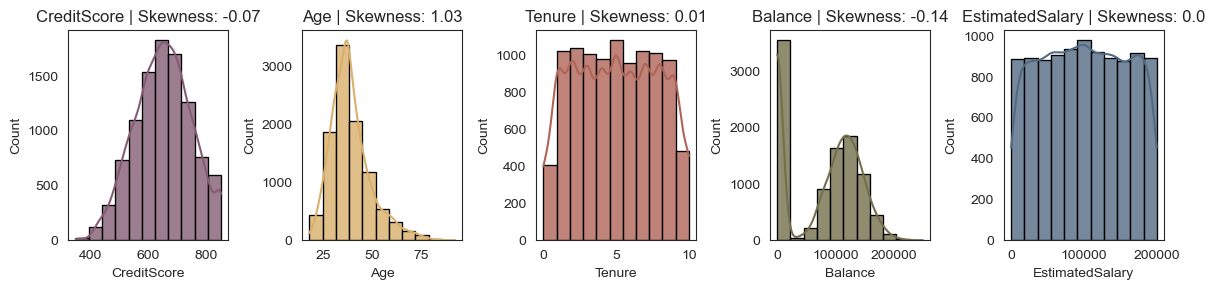

In [140]:
plot_graph(df_bank,columns)

## Standarization

In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
SS=StandardScaler()

In [144]:
standard_array=SS.fit_transform(df_bank)

In [145]:
standard_df=pd.DataFrame(standard_array,columns=df_bank.columns)

In [146]:
standard_df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain,Gender_Female,Gender_Male,Gender_NotSpecified
0,1.394409,-0.378346,0.104673,-0.698846,0.595020,-0.886728,0.607010,0.914479,-0.389192,-0.505775,-0.984717,-0.569806,-0.141024,1.764521,1.124041,-1.062766,-0.169100
1,-0.234616,1.113358,-0.473791,-1.393351,1.254318,-0.886728,0.607010,0.914479,-0.686561,-0.505775,1.015520,-0.569806,-0.141024,-0.566726,1.124041,-1.062766,-0.169100
2,1.394409,-1.134558,0.008262,1.384670,0.381156,-0.886728,0.607010,0.914479,1.737683,1.977165,-0.984717,1.754984,-0.141024,-0.566726,1.124041,-1.062766,-0.169100
3,-0.017412,-1.756101,-0.184559,1.037417,1.224647,0.839432,0.607010,0.914479,1.306693,-0.505775,1.015520,-0.569806,-0.141024,-0.566726,-0.889647,-1.062766,5.913647
4,-0.958627,0.626482,-0.184559,1.037417,0.603932,-0.886728,-1.527343,-1.022156,-0.346902,-0.505775,1.015520,-0.569806,-0.141024,-0.566726,1.124041,-1.062766,-0.169100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.370368,0.978690,0.875958,1.731923,0.315403,-0.886728,0.607010,-1.022156,-0.446336,-0.505775,-0.984717,1.754984,-0.141024,-0.566726,-0.889647,0.940941,-0.169100
9996,-0.286331,-0.243679,-0.859434,0.342912,-0.302652,-0.886728,0.607010,-1.022156,1.536365,-0.505775,-0.984717,1.754984,-0.141024,-0.566726,1.124041,-1.062766,-0.169100
9997,-0.331151,-0.513014,0.779548,-1.393351,-0.195642,0.839432,-1.527343,0.914479,-0.062734,-0.505775,1.015520,-0.569806,-0.141024,-0.566726,-0.889647,0.940941,-0.169100
9998,0.385965,-0.399065,-0.377380,-1.393351,-1.237017,-0.886728,0.607010,0.914479,-0.293894,1.977165,-0.984717,-0.569806,-0.141024,1.764521,-0.889647,0.940941,-0.169100


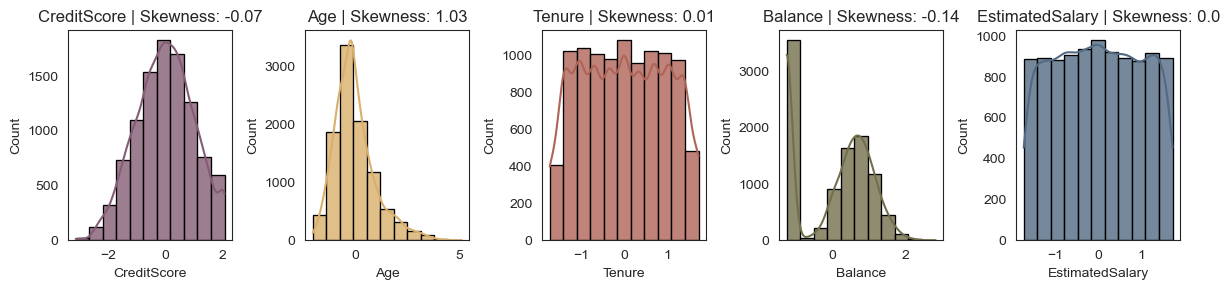

In [147]:
plot_graph(standard_df,columns)

## Normalization

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
MMS=MinMaxScaler()

In [151]:
normalize_array=MMS.fit_transform(df_bank)

In [152]:
normalize_df=pd.DataFrame(normalize_array,columns=df_bank.columns)

In [153]:
normalize_df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_NotReported,Geography_Spain,Gender_Female,Gender_Male,Gender_NotSpecified
0,0.500000,0.528,0.297297,0.3,0.451771,0.000000,0.5,0.5,0.388924,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.153846,0.816,0.216216,0.1,0.614351,0.000000,0.5,0.5,0.303616,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.500000,0.382,0.283784,0.9,0.399033,0.000000,0.5,0.5,0.999078,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.200000,0.262,0.256757,0.8,0.607034,0.333333,0.5,0.5,0.875437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.722,0.256757,0.8,0.453969,0.000000,0.0,0.0,0.401056,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.125000,0.790,0.405405,1.0,0.382819,0.000000,0.5,0.0,0.372531,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9996,0.142857,0.554,0.162162,0.6,0.230410,0.000000,0.5,0.0,0.941324,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9997,0.133333,0.502,0.391892,0.1,0.256798,0.333333,0.0,0.5,0.482578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.285714,0.524,0.229730,0.1,0.000000,0.000000,0.5,0.5,0.416263,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


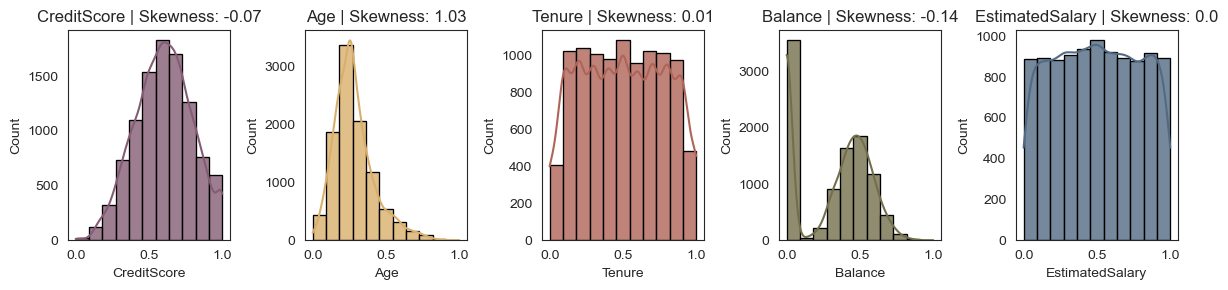

In [154]:
plot_graph(normalize_df,columns)

In [155]:
df_bank=normalize_df.copy()

In [156]:
df_bank.to_csv('./data/churn_data_scaled.csv')